Joao Filipe Costa da Quinta - TP1

In [2]:
import matplotlib.pyplot as plt
import math
import skimage
import cv2
import numpy as np
import copy
import skimage.metrics as metric
from scipy import signal
from skimage.measure import block_reduce
from os import listdir
from os.path import isfile, join


print("Imports done")

Imports done


In [3]:
# random functions that are used all over the project
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])
    
def affichage_rows_cols_images(rows, cols, images, labels):
    rows = rows
    cols = cols
    axes = []
    fig = plt.figure(figsize=(6*rows,4*cols))
    for i in range(rows * cols):
        axes.append(fig.add_subplot(rows, cols, i + 1))
        plt.imshow(images[i], cmap='gray')
        plt.title(labels[i])
        plt.axis('off')
    fig.tight_layout()
    plt.show()

def loadImageGray(name):
    return cv2.imread(name,0)

Exercice 1:  
- 1: read image, display its size and histogram  
- 2: convert image to grayscale  
- 3: compute global mean and variance of the image  
- 4: compute local mean and variance

# 1 - read and display image peacock.jpg


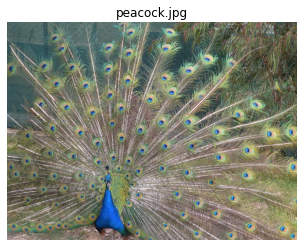

peacock.jpg - height:  792
peacock.jpg - width:  1056
peacock.jpg - channels:  3


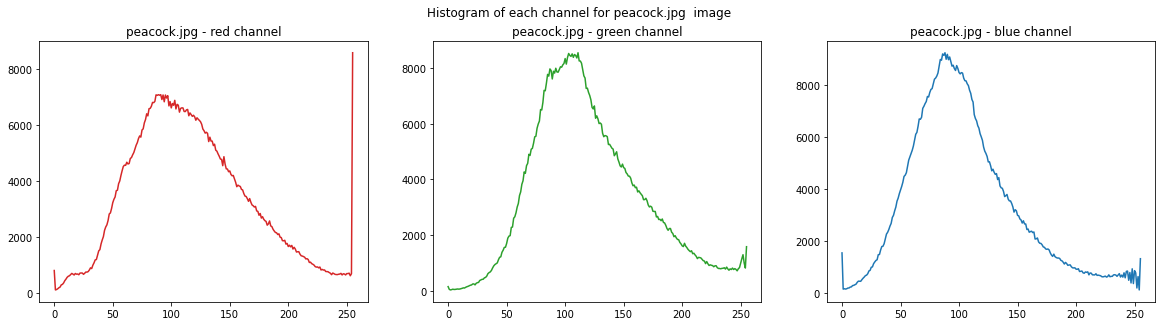

# 2 - convert image to grayscale and display it


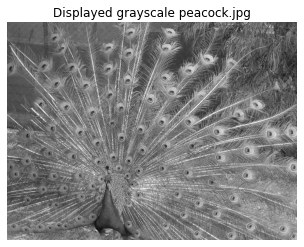

# 3 - compute global mean and variance
peacock.jpg - Global mean:  115.0840391764871
peacock.jpg - Global var:  2325.1879019771936

# 4 - compute local mean and variance


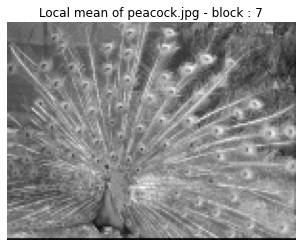

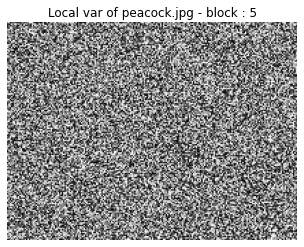

In [4]:
### 1
# read and display image peacock.jpg
print("# 1 - read and display image peacock.jpg")

peackock_image = plt.imread("peacock.jpg")
plt.figure()
plt.title("peacock.jpg")
plt.axis('off')
plt.imshow(peackock_image)
plt.show()
# image.shape gives us its dimensions -> height, width and number of channels
height,width,channels = peackock_image.shape
print("peacock.jpg - height: ",height)
print("peacock.jpg - width: ",width)
print("peacock.jpg - channels: ",channels)

# extract histograms of all 3 channels
# cv2.calcHist() -> function input: image, which channel, mask, bin count, bin range values
rHist = cv2.calcHist([peackock_image],[0],None,[256],[0,256])
gHist = cv2.calcHist([peackock_image],[1],None,[256],[0,256])
bHist = cv2.calcHist([peackock_image],[2],None,[256],[0,256])

# plot them
fig, axs = plt.subplots(1,3,figsize=(20,4.8))
fig.suptitle("Histogram of each channel for peacock.jpg  image")
axs[0].plot(rHist, 'tab:red')
axs[0].set_title('peacock.jpg - red channel')
axs[1].plot(gHist, 'tab:green')
axs[1].set_title('peacock.jpg - green channel')
axs[2].plot(bHist, 'tab:blue')
axs[2].set_title('peacock.jpg - blue channel')
plt.show()

### 2 convert image to grayscale and display it
print("# 2 - convert image to grayscale and display it")
gray_peackock_image = cv2.imread("peacock.jpg",0)
plt.figure()
plt.title("Displayed grayscale peacock.jpg")
plt.axis('off')
plt.imshow(gray_peackock_image, cmap = plt.get_cmap('gray'))
plt.show()

### 3 compute global mean and variance
print("# 3 - compute global mean and variance")
# to computle global meand and variance one simply uses functions .mean() and .var() from numpy
globalMean = peackock_image.mean()
globalVar = peackock_image.var()
print("peacock.jpg - Global mean: ",globalMean)
print("peacock.jpg - Global var: ",globalVar)

### 4 compute local mean and variance
print()
print("# 4 - compute local mean and variance")
# compute the mean we have to do a convolution, depending on the block size the results will be different (obviously), the convolution is a simple sum of pixex in the box, divided by the number of pixels in the box
localMean = block_reduce(peackock_image,block_size=7, func = np.mean)
localMean = localMean.astype(np.uint8)
plt.figure()
plt.title("Local mean of peacock.jpg - block : 7")
plt.axis('off')
plt.imshow(localMean, cmap = plt.get_cmap('gray'))
plt.show()


localVar = block_reduce(peackock_image,block_size=5, func = np.var)
localVar = localVar.astype(np.uint8)
plt.figure()
plt.title("Local var of peacock.jpg - block : 5")
plt.axis('off')
plt.imshow(localVar, cmap = plt.get_cmap('gray'))
plt.show()

We can see that the local mean is a blured image of the original one, it would be more or less blured depending on the box size  

Exercice 2:  
- we will talk about additive white gaussian noise
- and salt & pepper noise  
- To check our results we will frequently use MSE and PSNR measures  
  
-> first step is to implement the functions that do all of this 

In [5]:
def gaussianNoise(n, m , mu, sigma):
    return np.asarray([[np.random.normal(mu,sigma) for i in range(m)] for j in range(n)])

def addGaussianNoise(X, mu, sigma):
    n, m = X.shape
    Y = gaussianNoise(n, m , mu, sigma)
    return np.asarray([[max(min(255,X[j,i] + Y[j,i]),0) for i in range(m)] for j in range(n)])

def chooseValue(q, p, s_min, s_max, x):
    r = np.random.rand()
    if r <= p:
        return s_min
    elif r <= p+q:
        return s_max
    else:
        return x

def saltPepper(X, p, q):
    s_min = np.min(X)
    s_max = np.max(X)
    return np.asarray([[chooseValue(q, p, s_min, s_max, X[j,i]) for i in range(X.shape[1])] for j in range(X.shape[0])])

def MSE(X,Y):
    if X.shape == Y.shape:
        return np.sum([np.sum([(X[j,i]- Y[j,i])**2 for i in range(X.shape[1])]) for j in range(X.shape[0])]) / (X.shape[0]*X.shape[1])
    else:
        return 0

def PSNR(X,Y):
    a = 255
    mse = MSE(X,Y)
    if mse != 0:
        return 10 * np.log10(a**2/mse)
    else:
        return 0

def PSNR2(X,Y):
    a = 255
    sigma = np.sqrt(MSE(X,Y))
    return 10 * np.log10((a**2)/(sigma**2))



In [6]:

print("# load the same image twice, once where each pixel is described with 8 bits, and the other with 1 bit, compute their MSE")
gray_peackock_image_8_bit = cv2.imread("peacock.jpg",0)
gray_peackock_image_1_bit = skimage.img_as_float(cv2.imread("peacock.jpg",0))
mse_8_bit_1_bit = MSE(gray_peackock_image_8_bit,gray_peackock_image_1_bit)
psnr_8_bit_1_bit = PSNR(gray_peackock_image_8_bit,gray_peackock_image_1_bit)
psnr2_8_bit_1_bit = PSNR2(gray_peackock_image_8_bit,gray_peackock_image_1_bit)
print("MSE between the 2 images of different data types is : ", mse_8_bit_1_bit)
print("PSNR between the 2 images of different data types is : ", psnr_8_bit_1_bit)
print("PSNR2 between the 2 images of different data types is : ", psnr2_8_bit_1_bit)

# load the same image twice, once where each pixel is described with 8 bits, and the other with 1 bit, compute their MSE
MSE between the 2 images of different data types is :  16128.447786022514
PSNR between the 2 images of different data types is :  6.054877882962412
PSNR2 between the 2 images of different data types is :  6.054877882962412


This is due to the fact that the images are completely different, in the "normal" image, every pixel is described with 8 bits of data, wich means there are 256 values, where as the converted image is described with 1 bit, so there tare 2 values possible, which means that probably every pixel in the images are different !  

# lets add noise to images !


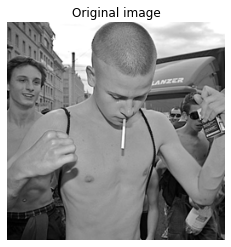

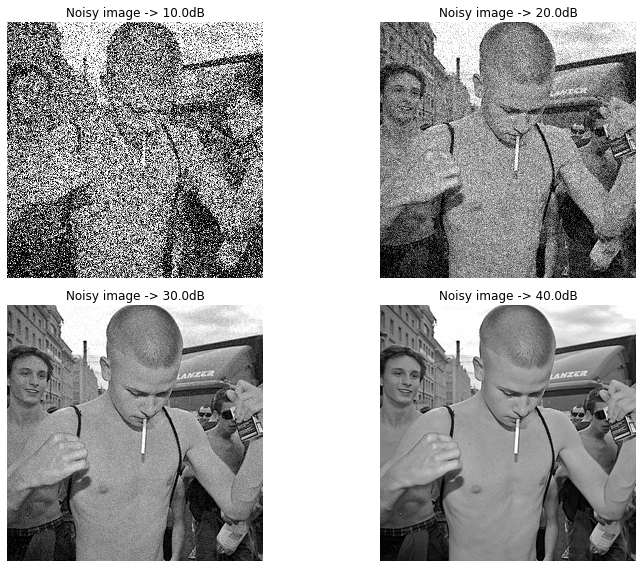

Noisy image -> 10.0dB  -> sigma = 100 :: MSE ->  6208.891
Noisy image -> 20.0dB  -> sigma = 27 :: MSE ->  681.732
Noisy image -> 30.0dB  -> sigma = 8 :: MSE ->  61.722
Noisy image -> 40.0dB  -> sigma = 2.5 :: MSE ->  6.089


In [7]:
# lets load a new image -> for instance, the 
print("# lets add noise to images !")
image_original_gray = np.float32(cv2.imread("dct_db/20100814000115_img_7357_630.tif",0))
plt.figure()
plt.title("Original image")
plt.axis('off')
plt.imshow(image_original_gray, cmap = plt.get_cmap('gray'))
plt.show()

images = []
labels = []
sigma = [100,27,8,2.5]
for i in sigma:
    noisy_image_original_gray = addGaussianNoise(image_original_gray,0,i)
    images.append(noisy_image_original_gray)
    psnr2 = PSNR2(noisy_image_original_gray, image_original_gray)
    labels.append("Noisy image -> "+ str(np.round(psnr2))+ "dB")

affichage_rows_cols_images(2, 2, images, labels)

for i in range(len(images)):
    x = np.round(MSE(image_original_gray, images[i]),3)
    print(labels[i], " -> sigma =", sigma[i], ":: MSE -> ", x)



We can see that a higher DB means the image is close to the original image !  
  
it is also interesting to see the rate of growth, +10 DB ==> /10 MSE

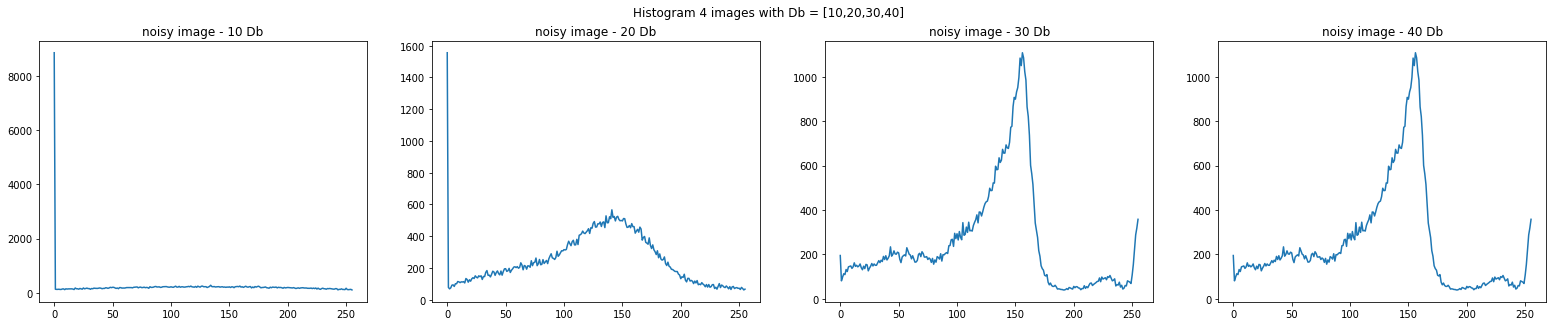

In [8]:
# plot them
hist0 = cv2.calcHist([np.float32(images[0])],[0],None,[256],[0,255])
hist1 = cv2.calcHist([np.float32(images[1])],[0],None,[256],[0,255])
hist2 = cv2.calcHist([np.float32(images[2])],[0],None,[256],[0,255])
hist2 = cv2.calcHist([np.float32(images[3])],[0],None,[256],[0,255])
fig, axs = plt.subplots(1,4,figsize=(27,4.8))
fig.suptitle("Histogram 4 images with Db = [10,20,30,40]")
axs[0].plot(hist0, 'tab:blue')
axs[0].set_title('noisy image - 10 Db')
axs[1].plot(hist1, 'tab:blue')
axs[1].set_title('noisy image - 20 Db')
axs[2].plot(hist2, 'tab:blue')
axs[2].set_title('noisy image - 30 Db')
axs[3].plot(hist2, 'tab:blue')
axs[3].set_title('noisy image - 40 Db')
plt.show()


we can see that the histograms become "flatter" the more noise there is, and that with noise, most bits start to be at 0 !

# lets add noise to images !


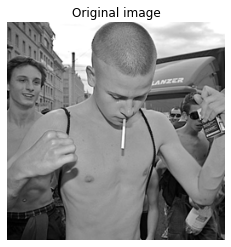

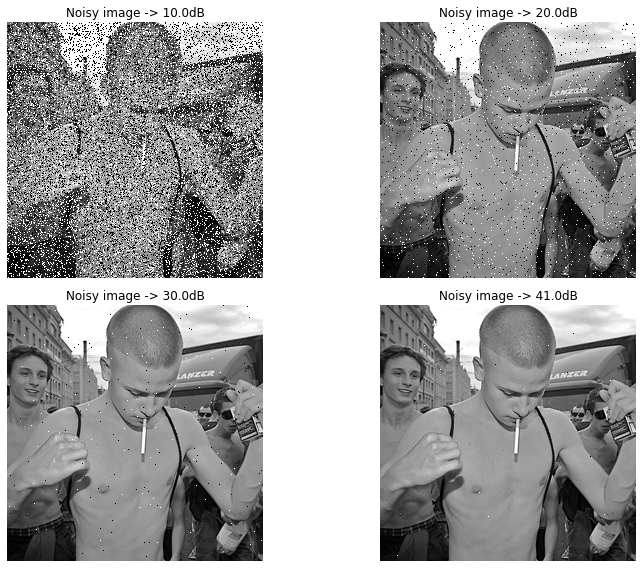

Noisy image -> 10.0dB :: MSE ->  6620.181
Noisy image -> 20.0dB :: MSE ->  684.757
Noisy image -> 30.0dB :: MSE ->  58.246
Noisy image -> 41.0dB :: MSE ->  5.788


In [9]:
# lets load a new image -> for instance, the 
print("# lets add noise to images !")
image_original_gray = np.float32(cv2.imread("dct_db/20100814000115_img_7357_630.tif",0))
plt.figure()
plt.title("Original image")
plt.axis('off')
plt.imshow(image_original_gray, cmap = plt.get_cmap('gray'))
plt.show()

images = []
labels = []
p = [0.17,0.018,0.0016,0.00016]
for i in range(len(p)):
    noisy_image_original_gray = saltPepper(image_original_gray, p[i], p[i])
    images.append(noisy_image_original_gray)
    psnr2 = PSNR2(noisy_image_original_gray, image_original_gray)
    labels.append("Noisy image -> "+ str(np.round(psnr2))+ "dB")

affichage_rows_cols_images(2, 2, images, labels)

for i in range(len(images)):
    x = np.round(MSE(image_original_gray, images[i]),3)
    print(labels[i], ":: MSE -> ", x)

GAUSSIAN NOISE:  
Noisy image -> 10.0dB  -> mu = 100 :: MSE ->  6231.13  
Noisy image -> 20.0dB  -> mu = 27 :: MSE ->  682.78  
Noisy image -> 30.0dB  -> mu = 8 :: MSE ->  62.264  
Noisy image -> 40.0dB  -> mu = 2.5 :: MSE ->  6.102  
  
SALT AND PEPPER:  
Noisy image -> 10.0dB :: MSE ->  6661.937  
Noisy image -> 20.0dB :: MSE ->  673.428  
Noisy image -> 29.0dB :: MSE ->  74.569  
Noisy image -> 40.0dB :: MSE ->  7.164  

  
Salt and pepper noise is much more noticeable than gaussian additive noise, for the same MSE/dB value

Perceptual Hash:  
- design and implement perceptual hash
- check for coliisions of hash
- implement function that computes hamming distance and Pb
- test how noise will influence perceptual hash computation
  
(1) first, lets implement the algorithm !  
(2) load all images, and compute all perceptual hashes  
(3) check for collisions  
(4) implement hamming distance function

In [10]:
def perceptualHash(gray_image):
    globalMean = gray_image.mean()
    localMean = block_reduce(gray_image,block_size=(32,32), func = np.mean)
    binaryV = np.asarray([1 if localMean_>globalMean else -1 for localMean_ in localMean.flatten()])
    return binaryV

def loadFilesInFolder(folder):
    return [f for f in listdir(folder) if isfile(join(folder, f))]

def computeHammingDistance(s1,s2):
    sum = [s1[i] == s2[i] for i in range(s1.shape[0])].count(False)
    error_pb = sum/s1.shape[0]
    return sum, error_pb

def load200Images(folder):
    fileNames = loadFilesInFolder(folder)
    return [loadImageGray(folder + "/" + fileName) for fileName in fileNames]
    

def computePerceptualHash(images=load200Images("dct_db")):
    perceptualHashes = np.asarray([perceptualHash(image) for image in images])
    return perceptualHashes.transpose()

def computeNoisyimages(images=load200Images("dct_db"), noiseType="gaussian", mu=0, sigma=1, p=0.1, q=0.1):
    if noiseType == "gaussian":
        noisy_images = [addGaussianNoise(image, mu, sigma) for image in images]
    else:
        noisy_images = [saltPepper(image, p, q) for image in images]
    perceptualHashes = np.asarray([perceptualHash(image_) for image_ in noisy_images])
    return perceptualHashes.transpose()
        

def computePbFromZ_(Z_, L):
    return [Z_[i,j]/L for i in range(Z_.shape[0]) for j in range(i+1,Z_.shape[0])]

def computePbFromZ(Z, L):
    return [Z_[i,i]/L for i in range(Z_.shape[0])]

def normalizeListVals(liste):
    t = np.sum(liste)
    return [v/t for v in liste]

In [11]:
fileNames = loadFilesInFolder("dct_db")
images = [loadImageGray("dct_db/"+image) for image in fileNames]
perceptualHashes = [perceptualHash(image) for image in images]

print("There are",len(perceptualHashes), "total perceptual hashes (each of a different image)")
print("There are",len(np.unique(perceptualHashes, axis=1)), "unique perceptual hashes")

There are 200 total perceptual hashes (each of a different image)
There are 200 unique perceptual hashes


As we can see, there are no collision,s which is normal, since there are $2^{64}$ possible hashes. 

In [12]:
images = load200Images("dct_db") # load images
X = computePerceptualHash(images) # matrix of size (64 x number of images)
Y = computeNoisyimages(images, noiseType="gaussian", sigma=4.5) # sigma = 4.5 -> 35 Db (gaussian noise) 
print(X.shape)
print(Y.shape)

(64, 200)
(64, 200)


In [13]:
L = 64
Z = np.matmul(X.transpose(),Y) # formule pour z
Z = np.divide((Z - L),-2)
Z_ = np.matmul(X.transpose(),X)# formule pour z'
Z_ = np.divide((Z_ - L),-2)
print(Z.shape)
print(Z_.shape)


(200, 200)
(200, 200)


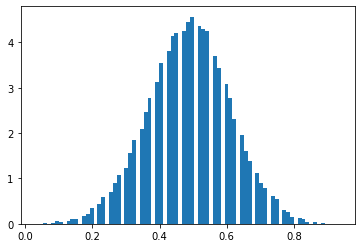

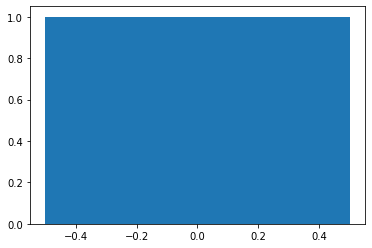

In [14]:
pb_list_inter = computePbFromZ_(Z_, L)
pb_list_intra = computePbFromZ(Z,L)

plt.hist(pb_list_inter, bins ="auto",label= "inter class",density=True)
#plt.hist(pb_list_intra, label= "intra class", bins ="auto",histtype="step",density=True)
plt.show()

plt.hist(pb_list_intra, bins ="auto",density=True)
plt.show()



Let's talk about the inter class histogram, most Pb are close the the middle, it meaning that half the bits are different.  
We can also see that no images have collided, and also, almost no perceptual hashes have complitely different value bits.

For the second histogram, I must have done something wrong, as I didn't expect this result.